In [1]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Word2Vec embeddings
See https://en.wikipedia.org/wiki/Word2vec for reference

In [30]:
# Train word2vec model to produce word embeddings based on our corpus

# define training data
# for now, split on whitespace
# TODO: Fancier preprocessing i.e. punctuation handling, stemming, lemmatization
sentences = [letter.lower().split() for letter in df['text'].tolist()]# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# save model
# model.save('model.bin')
# load model
# new_model = Word2Vec.load('model.bin')

Word2Vec(vocab=29780, size=100, alpha=0.025)


In [40]:
# Get closest words in vector space to pyrate
model.wv.most_similar('pyrate')

[('complement', 0.9938825368881226),
 ('carried', 0.9921998977661133),
 ('antea', 0.9920914173126221),
 ('guidah', 0.9918373823165894),
 ('commenda', 0.991675853729248),
 ('panyard', 0.9913508892059326),
 ('carrying', 0.9912232160568237),
 ('french', 0.9911662936210632),
 ('water', 0.9903877973556519),
 ('severall', 0.9901396036148071)]

# Toy Task: Analysis of the use of the word ''pyrate''


In [7]:
# Create indicator column for whether the word 'pyrate' is included in a given letter
df['pyrate'] = df['text'].apply(lambda text: True if ('pyrate' in text or 'pyrat' in text) else False)

In [8]:
sum(df['pyrate'])

41

In [59]:
# Subset for letters containing mention of pyrate
pyrate_subset = df[df['pyrate'] == True]

In [77]:
pyrate_subset.head()

,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,Rawlinson C.,Rawlinson C. .1,text,pyrate
14,5,1,5,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,27/06/1683,Fort,RAC,"745: 215v, 264","745: 215v, 264",Just now arrived a canoe from Axim whoe inform...,True
17,6,1,6,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,30/06/1683,Fort,RAC,"745: 217, 266","745: 217, 266",Your Worships of the 28th instant I have per t...,True
19,6,1,6,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,30/06/1683,Fort,RAC,"745: 217, 266","745: 217, 266","I have by this canoe sent downe Robert Stone, ...",True
21,7,1,7,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,02/07/1683,Fort,RAC,"745: 218, 266v","745: 218, 266v",This is to acquaint your Worship that just now...,True
23,7,1,7,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,02/07/1683,Fort,RAC,"745: 218, 266v","745: 218, 266v","This accompanys Joseph Collenwood , who came i...",True


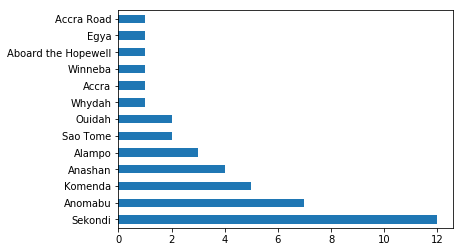

In [76]:
pyrate_subset['Place Sent From'].value_counts().plot(kind='barh')

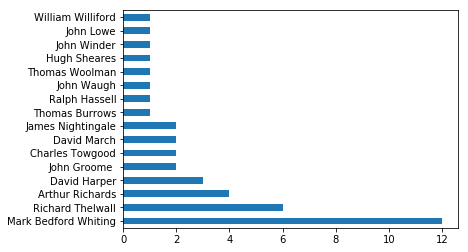

In [75]:
pyrate_subset['Sender'].value_counts().plot(kind='barh')

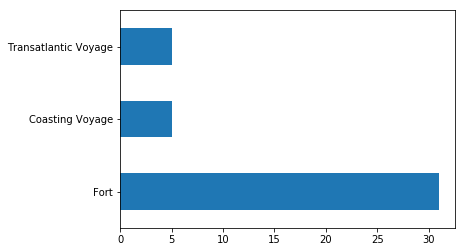

In [80]:
pyrate_subset['Boat/Fort'].value_counts().plot(kind='barh')